# Exploration Notes

Oh this one has so many fun moments! There's this one, right now. Where my kernal didn't shut down effectively so I'm having to re-type the notebook (at least I can clean while I re-type, and it wasn't as bad as it could have been!)

There's me struggling all day to finally find a function that works, to find out that Raf shared a way to do just that in the first two minutes of the Violin Plots video! That's alright, I just keep repeating my mantra for the week: "It's not wasted time if you learned something.... right?!"

First, I pull in the dfGenreFin info and the unique genres list. I dropped unnecessary columns, and we decided on our main list of genres.

Then I graphed the mean gross by genre and the mean production budget by genre; along with the top 7 and 5 from each.

Then I tried playing around with Seaborn, and attempted to chart the two of these together. That's when I realized that I was going to have to stack the data by Genre - which took another frustratingly long time to pull a dataframe together for. 

Alas! We have persevered, and managed to plot an ugly little violin chart that displays the instances of ROI on the top 5 grossing genres(mean).



In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [44]:
%store -r dfGenreFin

In [45]:
dfGenreFin.rename(columns = {'index' : 'title'}, inplace = True)
dfGenreFin.head()

,title,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,original_title,start_year,runtime_minutes,averagerating,numvotes,movie_id,genresList
0,'71,RAtt.,1300000.0,355000.0,2015.0,NaN,0.0,1655000.0,'71,2014.0,99.0,7.2,46103.0,tt2614684,"[Action, Drama, Thriller]"
1,"1,000 Times Good Night",FM,53900.0,0.0,2014.0,NaN,0.0,53900.0,Tusen ganger god natt,2013.0,117.0,7.1,6848.0,tt2353767,"[Drama, War]"
2,10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,"Mar 11, 2016",5000000.0,108286422.0,10 Cloverfield Lane,2016.0,103.0,7.2,260383.0,tt1179933,"[Drama, Horror, Mystery]"
3,10 Days in a Madhouse,NaN,14616.0,0.0,NaN,"Nov 11, 2015",12000000.0,14616.0,10 Days in a Madhouse,2015.0,111.0,6.7,1114.0,tt3453052,[Drama]
4,10 Years,Anch.,203000.0,0.0,2012.0,NaN,0.0,203000.0,10 Years,2011.0,100.0,6.1,22484.0,tt1715873,"[Comedy, Drama, Romance]"


- Pulling in list of unique genres

In [46]:
%store -r oneGenreList

In [47]:
uniqueGenres = oneGenreList['genres'].unique()

In [48]:
uniqueGenres

array(['Drama', 'Comedy', 'Biography', 'History', 'Documentary', 'Sci-Fi',
       'Thriller', 'Horror', 'Action', 'Adventure', 'Fantasy', 'Musical',
       'Western', 'Romance', 'Mystery', 'Crime', 'Animation', 'Family',
       'Sport', 'Music', 'News', 'Talk-Show', 'Reality-TV', 'War',
       'Game-Show'], dtype=object)

In [49]:
len(uniqueGenres)

25

# Getting information ready for plotting

- Or so I thought!

In [50]:
from importlib import reload
import functions as fun

reload(fun)

<module 'functions' from 'C:\\Users\\kekay\\flatiron\\Module01\\Project\\dsc-mod-1-project-v2-1-onl01-dtsc-ft-041320\\functions.py'>

In [51]:
fun.count('News', dfGenreFin)

11

Ignore:
- Game-Show : 0
- Reality-TV : 0
- Talk-Show : 0
- News : 11 (Featured in other genres as well)

In [52]:
genreList = ['Action', 'Adventure', 'Animation', 'Biography', 'Drama', 'Comedy', 'History', 
             'Documentary', 'Sci-Fi', 'Thriller', 'Horror', 'Fantasy', 'Musical', 'Western', 'Romance', 
             'Mystery', 'Crime', 'Family', 'Sport', 'Music', 'War']

In [53]:
genreList.sort()
genreList

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [54]:
%store genreList

Stored 'genreList' (list)


# Mean Gross by Genre

In [55]:
def getMeanGrossData():
    data = []
    for i in genreList:
        data.append(fun.meanGross(i, dfGenreFin))
    return data

In [56]:
meanGrossData = getMeanGrossData()

In [57]:
meanGrossData

[54043316.219251335,
 88147457.58236273,
 83692006.28921568,
 21693540.207407407,
 33302470.265402842,
 23121060.36642599,
 23248293.022421524,
 19737887.80093761,
 60032657.344827585,
 66945316.448275864,
 19700843.310526315,
 27129086.14412417,
 35340738.59550562,
 82193277.88636364,
 24146523.306060605,
 17938810.294209704,
 82307881.88936171,
 28450808.24742268,
 27549630.76994681,
 14440282.333333334,
 24682976.085714284]

In [58]:
grossData = pd.DataFrame({'Genre' : genreList,
                          'Mean Gross' : meanGrossData,})

grossData

,Genre,Mean Gross
0,Action,5.404332e+07
1,Adventure,8.814746e+07
2,Animation,8.369201e+07
3,Biography,2.169354e+07
4,Comedy,3.330247e+07
5,Crime,2.312106e+07
6,Documentary,2.324829e+07
7,Drama,1.973789e+07
8,Family,6.003266e+07
9,Fantasy,6.694532e+07


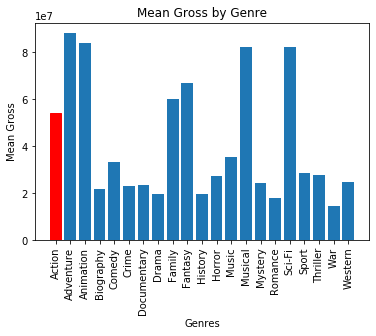

In [21]:
data = meanGrossData
labels = genreList
plt.xticks(range(len(data)), labels, rotation= 90)
plt.xlabel('Genres')
plt.ylabel('Mean Gross')
plt.title('Mean Gross by Genre')
bar_list = plt.bar(range(len(data)), data)



bar_list[0].set_color('r')
plt.show()

- ^ It's definitely gross!

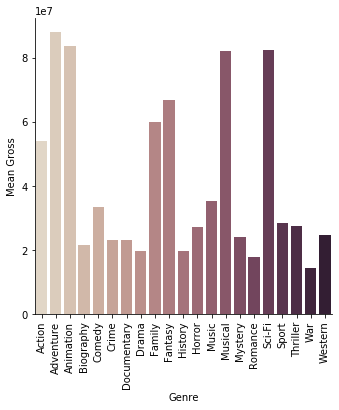

In [22]:
g = sns.catplot(x="Genre", y="Mean Gross", kind="bar", palette="ch:.25", data= grossData);
g.set_xticklabels(rotation = 90)
#plt.set_title("Mean Gross by Genre")
plt.show()

In [23]:
top7GrossingGenres = grossData.loc[grossData['Mean Gross'] >= grossData['Mean Gross'][0]]
top5GrossingGenres = grossData.loc[grossData['Mean Gross'] >= grossData['Mean Gross'][9]]

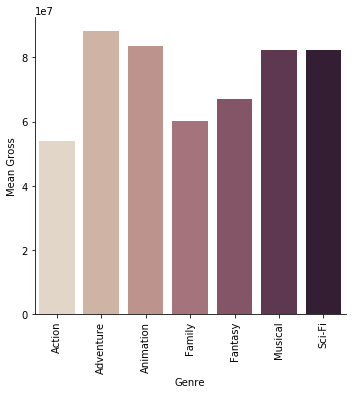

In [41]:
g = sns.catplot(x="Genre", y="Mean Gross", kind="bar", palette =("ch:.25"), data= top7GrossingGenres);
g.set_xticklabels(rotation = 90)
plt.show()

# Mean Production Budget by Genre

In [59]:
def getMeanBudgetData():
    data = []
    for i in genreList:
        data.append(fun.meanBudget(i, dfGenreFin))
    return data

In [60]:
meanBudgetData = getMeanBudgetData()

In [61]:
budgetData = pd.DataFrame({'Genre' : genreList,
                           'Mean Budget' : meanBudgetData})

budgetData

,Genre,Mean Budget
0,Action,4.673630e+07
1,Adventure,7.063706e+07
2,Animation,5.766503e+07
3,Biography,1.519645e+07
4,Comedy,2.178094e+07
5,Crime,1.921784e+07
6,Documentary,1.833320e+07
7,Drama,1.521898e+07
8,Family,4.037878e+07
9,Fantasy,5.043849e+07


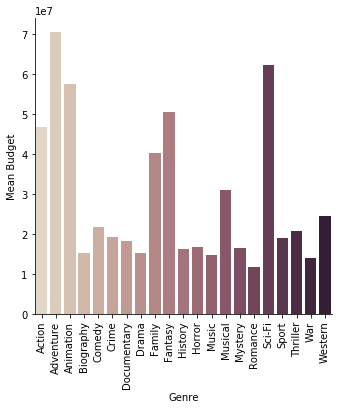

In [24]:
g = sns.catplot(x="Genre", y="Mean Budget", kind="bar", palette="ch:.25", data= budgetData);
g.set_xticklabels(rotation = 90)
#plt.set_title("Mean Gross by Genre")
plt.show()

In [25]:
top7GenreBudgets = budgetData.loc[budgetData['Mean Budget'] >= budgetData['Mean Budget'][13]]
top5GenreBudgets = budgetData.loc[budgetData['Mean Budget'] >= budgetData['Mean Budget'][0]]

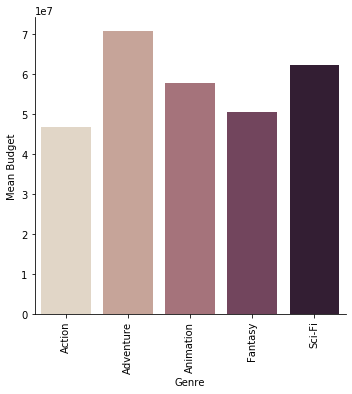

In [26]:
g = sns.catplot(x="Genre", y="Mean Budget", kind="bar", palette="ch:.25", data= top5GenreBudgets);
g.set_xticklabels(rotation = 90)
plt.show()

# Try to graph both mean gross and mean budget

In [62]:
meanData = pd.DataFrame({'Genre' : genreList,
                         'Mean Gross' : meanGrossData,
                         'Mean Budget' : meanBudgetData})

In [63]:
meanData.head()

,Genre,Mean Gross,Mean Budget
0,Action,5.404332e+07,4.673630e+07
1,Adventure,8.814746e+07,7.063706e+07
2,Animation,8.369201e+07,5.766503e+07
3,Biography,2.169354e+07,1.519645e+07
4,Comedy,3.330247e+07,2.178094e+07


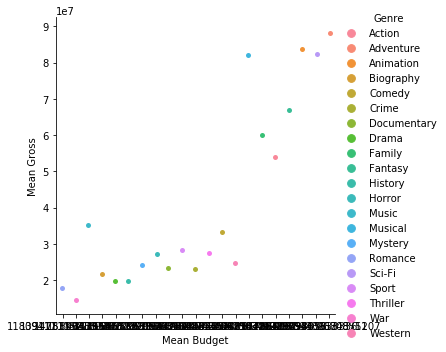

In [29]:
ax = sns.catplot(x= 'Mean Budget', y= 'Mean Gross', hue ='Genre', data = meanData)

- Okay not so much, maybe try something else:

In [30]:
dfGenreFin.head()

,title,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,original_title,start_year,runtime_minutes,averagerating,numvotes,movie_id,genresList
0,'71,RAtt.,1300000.0,355000.0,2015.0,NaN,0.0,1655000.0,'71,2014.0,99.0,7.2,46103.0,tt2614684,"[Action, Drama, Thriller]"
1,"1,000 Times Good Night",FM,53900.0,0.0,2014.0,NaN,0.0,53900.0,Tusen ganger god natt,2013.0,117.0,7.1,6848.0,tt2353767,"[Drama, War]"
2,10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,"Mar 11, 2016",5000000.0,108286422.0,10 Cloverfield Lane,2016.0,103.0,7.2,260383.0,tt1179933,"[Drama, Horror, Mystery]"
3,10 Days in a Madhouse,NaN,14616.0,0.0,NaN,"Nov 11, 2015",12000000.0,14616.0,10 Days in a Madhouse,2015.0,111.0,6.7,1114.0,tt3453052,[Drama]
4,10 Years,Anch.,203000.0,0.0,2012.0,NaN,0.0,203000.0,10 Years,2011.0,100.0,6.1,22484.0,tt1715873,"[Comedy, Drama, Romance]"


In [31]:
dfGenreFinGrouped = dfGenreFin.groupby(['genresList'])[['domestic_gross', 'foreign_gross', 'worldwide_gross', 'production_budget']]

In [32]:
dfGenreFinGrouped

# Let's group by Genre individually

In [64]:
 def getGenreInfo(keyword):    
    allInfo = {}
    title = []
    genre = []
    domestic_gross = []
    foreign_gross = []
    worldwide_gross = []
    production_budget = []
    for i in dfGenreFin.index:
        
        if any(keyword in g for g in dfGenreFin['genresList'][i]):
            genre.append(keyword)
            title.append(dfGenreFin['title'][i])
            domestic_gross.append(dfGenreFin['domestic_gross'][i])
            foreign_gross.append(dfGenreFin['foreign_gross'][i])
            worldwide_gross.append(dfGenreFin['worldwide_gross'][i])
            production_budget.append(dfGenreFin['production_budget'][i])
        allInfo.update({'Title' : title,
                        'Genre' : genre,
                        'Domestic Gross' : domestic_gross,
                        'Foreign Gross' : foreign_gross,
                        'Worldwide Gross' : worldwide_gross,
                        'Production Budget' : production_budget})
    return allInfo

In [65]:
nextTestDF = pd.DataFrame(getGenreInfo('Action'))
nextTestDF

,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget
0,'71,Action,1300000.0,355000.0,1655000.0,0.0
1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0
2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0
3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0
4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0
...,...,...,...,...,...,...
930,You're Next,Action,18500000.0,8387177.0,26887177.0,1000000.0
931,Young Detective Dee: Rise of the Sea Dragon,Action,87800.0,72200000.0,72287800.0,0.0
932,Z Storm,Action,0.0,2053330.0,2053330.0,7000000.0
933,Zombeavers,Action,14900.0,0.0,14900.0,0.0


In [66]:
def getDataForGenres():
    thisDict = {}
    for i in genreList:
        thisDict.update(getGenreInfo(i))

In [67]:
for i in genreList:
        print(getGenreInfo(i))

{'Title': ["'71", '12 Rounds', '12 Strong', '13 Assassins', '14 Blades', '1911', '2 Guns', '21 Jump Street', '22 Bullets', '22 Jump Street', '3 Days to Kill', '30 Minutes or Less', '300: Rise of an Empire', '47 Ronin', '5 Days of War', '7 Days in Entebbe', 'A Gentleman', 'A Good Day to Die Hard', 'A Melody to Remember', 'A Taxi Driver', 'A Walk Among the Tombstones', 'ATM', 'Abduction', 'Abduction', 'Abduction', 'Abraham Lincoln: Vampire Hunter', 'Act of Valor', 'Action Jackson', 'Adam', 'Admiral', 'Adrift', 'After Earth', 'Agent Vinod', 'Agneepath', 'Air Strike', 'Akira', 'Alex Cross', 'Alita: Battle Angel', 'All Is Lost', 'All or Nothing', 'Allied', 'Along with the Gods: The Two Worlds', 'American Assassin', 'American Heist', 'American Hero', 'American Made', 'American Sniper', 'American Ultra', 'Anna', 'Anonymous', 'Ant-Man', 'Ant-Man and the Wasp', 'Aquaman', "Assassin's Creed", 'Assassins', 'Asura: The City of Madness', 'Atomic Blonde', 'Attack on Titan: Part 1', 'Attack the Block

{'Title': ['A Letter to Momo', 'A Monster Calls', 'A Silent Voice', 'A.C.O.R.N.S.: Operation Crackdown', 'Alpha and Omega', 'Alvin and the Chipmunks: Chipwrecked', 'Alvin and the Chipmunks: The Road Chip', 'Anomalisa', 'April and the Extraordinary World', 'Arthur Christmas', 'As Above, So Below', 'Back to the Jurassic', 'Barbara', 'Batman: The Killing Joke', 'Big Hero 6', 'Bilal: A New Breed of Hero', 'Black Butler: Book of the Atlantic', 'Boruto: Naruto the Movie', 'Brave', 'Captain Underpants: The First Epic Movie', 'Capture the Flag', 'Cars 2', 'Cars 3', 'Chico & Rita', 'Christopher Robin', 'Cloudy with a Chance of Meatballs 2', 'Coco', 'Death of a Superhero', 'Despicable Me', 'Despicable Me 2', 'Despicable Me 3', 'Dinosaur', 'Dinosaur', 'Dragon Ball Super: Broly', 'Dragon Ball Z: Battle of Gods', "Dragon Ball Z: Resurrection 'F'", 'Early Man', 'Eden', 'Epic', 'Ernest & Celestine', 'Evangelion: 3.0 You Can (Not) Redo', "Fate/Stay Night: Heaven's Feel - I. Presage Flower", "Father's 

{'Title': ['10 Years', '102 Not Out', '2 Autumns, 3 Winters', '2 Days in New York', '2 Guns', '2 States', '20th Century Women', '21 Jump Street', '22 Jump Street', '3', '3', '30 Minutes or Less', '5 Flights Up', '5 to 7', '50/50', '9', 'A Bad Moms Christmas', 'A Coffee in Berlin', "A Dog's Purpose", 'A Few Best Men', 'A Gentleman', 'A Glimpse Inside the Mind of Charles Swan III', 'A Good Old Fashioned Orgy', 'A Haunted House', 'A Haunted House 2', 'A Hologram for the King', 'A Letter to Momo', 'A Little Bit of Heaven', 'A Long Way Down', 'A Man Called Ove', 'A Million Ways to Die in the West', 'A Perfect Day', 'A Pigeon Sat on a Branch Reflecting on Existence', 'A Royal Night Out', 'A Simple Favor', 'A Somewhat Gentle Man', 'A Street Cat Named Bob', 'A Thousand Words', 'A Very Harold & Kumar 3D Christmas', 'A Walk in the Woods', 'A.C.O.R.N.S.: Operation Crackdown', 'ATM', 'Abduction', 'About Last Night', 'About Time', 'Abracadabra', 'Absolutely Anything', 'Absolutely Fabulous: The Movi

{'Title': ['20 Feet from Stardom', '20,000 Days on Earth', '3', '50/50', '8: The Mormon Proposition', 'A Beautiful Planet', 'A Man for All Seasons', 'A Quiet Place', 'A Separation', 'A Star is Born', 'Above and Beyond', 'Above and Beyond', 'Addicted', 'Advanced Style', 'African Cats', 'Ai Weiwei: Never Sorry', 'Alice in Wonderland', 'All You Need Is Love', 'All or Nothing', 'All or Nothing', 'American Dreamz', 'Amy', 'An Inconvenient Sequel: Truth to Power', 'Anchor Baby', 'Anna', 'Annie', 'Annie', 'Another Year', 'Antarctica: A Year on Ice', 'Antonio Lopez 1970: Sex Fashion & Disco', 'Any Given Sunday', 'Archipelago', 'Argentina', 'Armadillo', 'Arrival', 'As Above, So Below', 'As Above, So Below', 'Aurora', 'Author: The JT LeRoy Story', 'Awake: The Life of Yogananda', 'Babies', 'Ballerina', 'Bambi', 'Barbara', 'Barbecue', 'Bastards', 'Bears', 'Becoming Traviata', 'Before We Go', "Being Elmo: A Puppeteer's Journey", 'Believe', 'Beloved', 'Bending the Arc', 'Benji', 'Beyond Borders', 'B

{'Title': ["'71", '1,000 Times Good Night', '10 Cloverfield Lane', '10 Days in a Madhouse', '10 Years', '1001 Grams', '102 Not Out', '12 Rounds', '12 Strong', '12 Years a Slave', '127 Hours', '13 Assassins', '17 Girls', '1911', '2 Days in New York', '2 States', '20,000 Days on Earth', '20th Century Women', '22 Bullets', '23 Blast', '28 Hotel Rooms', '3', '3', '3', '3', '3 Backyards', '3 Days to Kill', '3 Generations', '360', '42', '45 Years', '47 Meters Down', '47 Ronin', '5 Days of War', '5 Flights Up', '5 to 7', '50 to 1', '50/50', '6 Below: Miracle on the Mountain', '7 Boxes', '7 Days in Entebbe', '90 Minutes in Heaven', '99 Homes', 'A Beautiful Life', 'A Better Life', 'A Better Life', 'A Bigger Splash', 'A Bottle in the Gaza Sea', 'A Brilliant Young Mind', 'A Ciambra', 'A Coffee in Berlin', 'A Cure for Wellness', 'A Dangerous Method', "A Dog's Purpose", 'A Fantastic Woman', 'A Five Star Life', 'A Gentleman', 'A Ghost Story', 'A Girl Walks Home Alone at Night', 'A Hijacking', 'A Hol

{'Title': ['12 Strong', '12 Years a Slave', '14 Blades', '7 Days in Entebbe', 'A Royal Affair', 'A Tale of Love and Darkness', 'A Taxi Driver', 'Above and Beyond', 'Afterimage', 'All or Nothing', 'Alone in Berlin', 'Anthropoid', 'Bajirao Mastani', 'Beginning of the Great Revival', 'Bel Ami', 'Beloved Sisters', 'Beneath Hill 60', 'Bridge of Spies', 'Burke and Hare', 'Capital', 'Cave of Forgotten Dreams', 'Chappaquiddick', 'Child 44', 'Churchill', 'Cinco de Mayo, La Batalla', 'Colette', 'Colette', 'Contact', 'Coriolanus', 'Darkest Hour', 'Deepwater Horizon', 'Detroit', 'Dunkirk', 'Edmond', 'Elvis & Nixon', 'Emperor', 'Enough', 'Escobar: Paradise Lost', 'Even the Rain', 'Experimenter', 'Eyes Wide Open', 'First Man', 'For Greater Glory: The True Story of Cristiada', 'For No Good Reason', 'Fort McCoy', 'Francofonia', 'Frantz', 'Free Men', 'Ghost Town', 'Gold', 'Gold', 'Hacksaw Ridge', 'Hell and Back Again', 'Heneral Luna', 'Hidden Figures', 'Home', 'Home', 'Home', 'Home', 'Hostage', 'In Thi

{'Title': ['20 Feet from Stardom', '20,000 Days on Earth', 'A Late Quartet', 'A Star is Born', 'ABCD (Any Body Can Dance)', 'Addicted', 'Ae Dil Hai Mushkil', 'After the Storm', 'Alice in Wonderland', 'All Eyez on Me', 'Along the Roadside', 'Amen', 'American Hero', 'Amy', 'Anjaana Anjaani', 'Annie', 'Argentina', 'Barbara', 'Battle of the Year', 'Beauty and the Beast', 'Beauty and the Beast', 'Beauty and the Beast', 'Beauty and the Beast', 'Becoming Traviata', 'Begin Again', 'Beloved', 'Beyond the Lights', 'Billy Elliot', 'Black Nativity', 'Bohemian Rhapsody', "Brad's Status", 'Brooklyn', 'Bully', 'Bully', 'Burlesque', 'Burn the Stage: The Movie', 'Celine: Through the Eyes of the World', 'Chance Pe Dance', 'Chloe', 'Cinderella', 'Cinderella', 'Cinderella', 'Cinderella', 'Cinderella', 'Cinderella', 'Commitment', 'Country Strong', 'Desert Dancer', 'Destiny', 'Eden', 'Emma', 'Filly Brown', 'Finding Your Feet', 'Footloose', 'Footloose', 'Forever My Girl', 'Frank', 'Freedom', 'Gainsbourg: A H

{'Title': ['10 Years', '12 Rounds', '2 Days in New York', '2 States', '28 Hotel Rooms', '3', '3', '45 Years', '5 to 7', '50/50', 'A Beautiful Life', 'A Better Life', 'A Brilliant Young Mind', 'A Dangerous Method', 'A Few Best Men', 'A Five Star Life', 'A Ghost Story', 'A Good Old Fashioned Orgy', 'A Hologram for the King', 'A Little Chaos', 'A Man Called Ove', 'A Royal Night Out', 'A Silent Voice', 'A United Kingdom', 'A Wedding Invitation', 'A Werewolf Boy', 'About Last Night', 'Accidental Love', 'Acrimony', 'Admission', 'Adore', 'Adrift', "Ain't Them Bodies Saints", 'Akira', 'Albert Nobbs', 'All You Need Is Love', 'All You Need Is Love', 'All or Nothing', 'Allied', 'Aloha', 'Along the Roadside', 'Amen', 'American Honey', 'Amour', 'And So It Goes', 'Anna Karenina', 'Annie', 'Another Earth', 'Another Year', 'Appropriate Behavior', 'Arthur', 'August', 'Aurora', 'Austenland', 'Baar Baar Dekho', 'Bachelorette', 'Bad Teacher', 'Badrinath Ki Dulhania', 'Band Baaja Baaraat', 'Barfi', 'Barfi!

{'Title': ["'71", '11-11-11', '13 Sins', '14 Blades', '2:22', '3', '3 Days to Kill', '31', '360', '6 Souls', 'A Bigger Splash', 'A Good Day to Die Hard', 'A Hijacking', 'A Lonely Place to Die', 'A Monster with a Thousand Heads', 'A Most Violent Year', 'A Most Wanted Man', 'A Separation', 'ATM', 'Abduction', 'Abduction', 'Acrimony', 'Action Jackson', 'Adam', 'Addicted', 'Agent Vinod', 'Alien: Covenant', 'Alive', 'All or Nothing', 'All or Nothing', 'American Assassin', 'Amityville: The Awakening', 'Anchor Baby', 'Andhadhun', 'Anesthesia', 'Anna', 'Anna', 'Annabelle', 'Annabelle: Creation', 'Anonymous', 'Anthropoid', 'Antiviral', 'Anywhere But Here', 'Apartment 143', 'Arbitrage', 'Area 51', 'Argo', 'As Good as Dead', 'Assassins', 'At Any Price', 'Atomic Blonde', 'Aurora', 'Baaghi', 'Baaghi 2', 'Bad Company', 'Bad Samaritan', 'Bait', 'Bait', 'Bait', 'Banshee Chapter', 'Beast', 'Beast', 'Beauty and the Dogs', 'Beirut', 'Berberian Sound Studio', 'Bethlehem', 'Beyond the Black Rainbow', 'Beyo

In [37]:
def thisDict():
    thisDict = {}
    for i in genreList:
        thisDict.update(getGenreInfo(i))
    return thisDict

In [38]:
print(thisDict())

{'Title': ['A Million Ways to Die in the West', 'Blackthorn', 'Branded', 'Casa de mi Padre', 'Destiny', 'Django Unchained', 'Far from Men', 'Frontera', 'Gold', 'Hostiles', 'Jane Got a Gun', 'Jauja', 'Let the Bullets Fly', "Meek's Cutoff", "No Man's Land", 'Red Hill', 'Saving Private Perez', 'Slow West', 'Steel', 'The Divide', 'The Forgotten', 'The Gunman', 'The Homesman', 'The Keeping Room', 'The Kid', 'The Lone Ranger', 'The Magnificent Seven', 'The Return', 'The Rider', 'The Salvation', "The Warrior's Way", 'Trespass', 'True Grit', 'Wild Things', 'Witness'], 'Genre': ['Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western'], 'Domestic Gross': [43100000.0, 201000

# After many an error, we have found a way!

In [39]:
genreList

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [68]:
def toConcat():
    concatList = []
    for i in genreList:
        thisDF = pd.DataFrame(getGenreInfo(i))
        concatList.append(thisDF)
    return concatList

In [69]:
GenreDF = pd.concat(toConcat())
GenreDF

,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget
0,'71,Action,1300000.0,355000.0,1655000.0,0.0
1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0
2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0
3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0
4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0
...,...,...,...,...,...,...
30,The Warrior's Way,Western,5700000.0,5400000.0,8514325.0,42000000.0
31,Trespass,Western,16816.0,769716.0,786532.0,35000000.0
32,True Grit,Western,171200000.0,81000000.0,252276928.0,35000000.0
33,Wild Things,Western,29795299.0,25781400.0,55576699.0,20000000.0


In [70]:
GenreDF2 = GenreDF.reset_index()
GenreDF2

,index,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget
0,0,'71,Action,1300000.0,355000.0,1655000.0,0.0
1,1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0
2,2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0
3,3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0
4,4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0
...,...,...,...,...,...,...,...
10936,30,The Warrior's Way,Western,5700000.0,5400000.0,8514325.0,42000000.0
10937,31,Trespass,Western,16816.0,769716.0,786532.0,35000000.0
10938,32,True Grit,Western,171200000.0,81000000.0,252276928.0,35000000.0
10939,33,Wild Things,Western,29795299.0,25781400.0,55576699.0,20000000.0


# Try to plot:

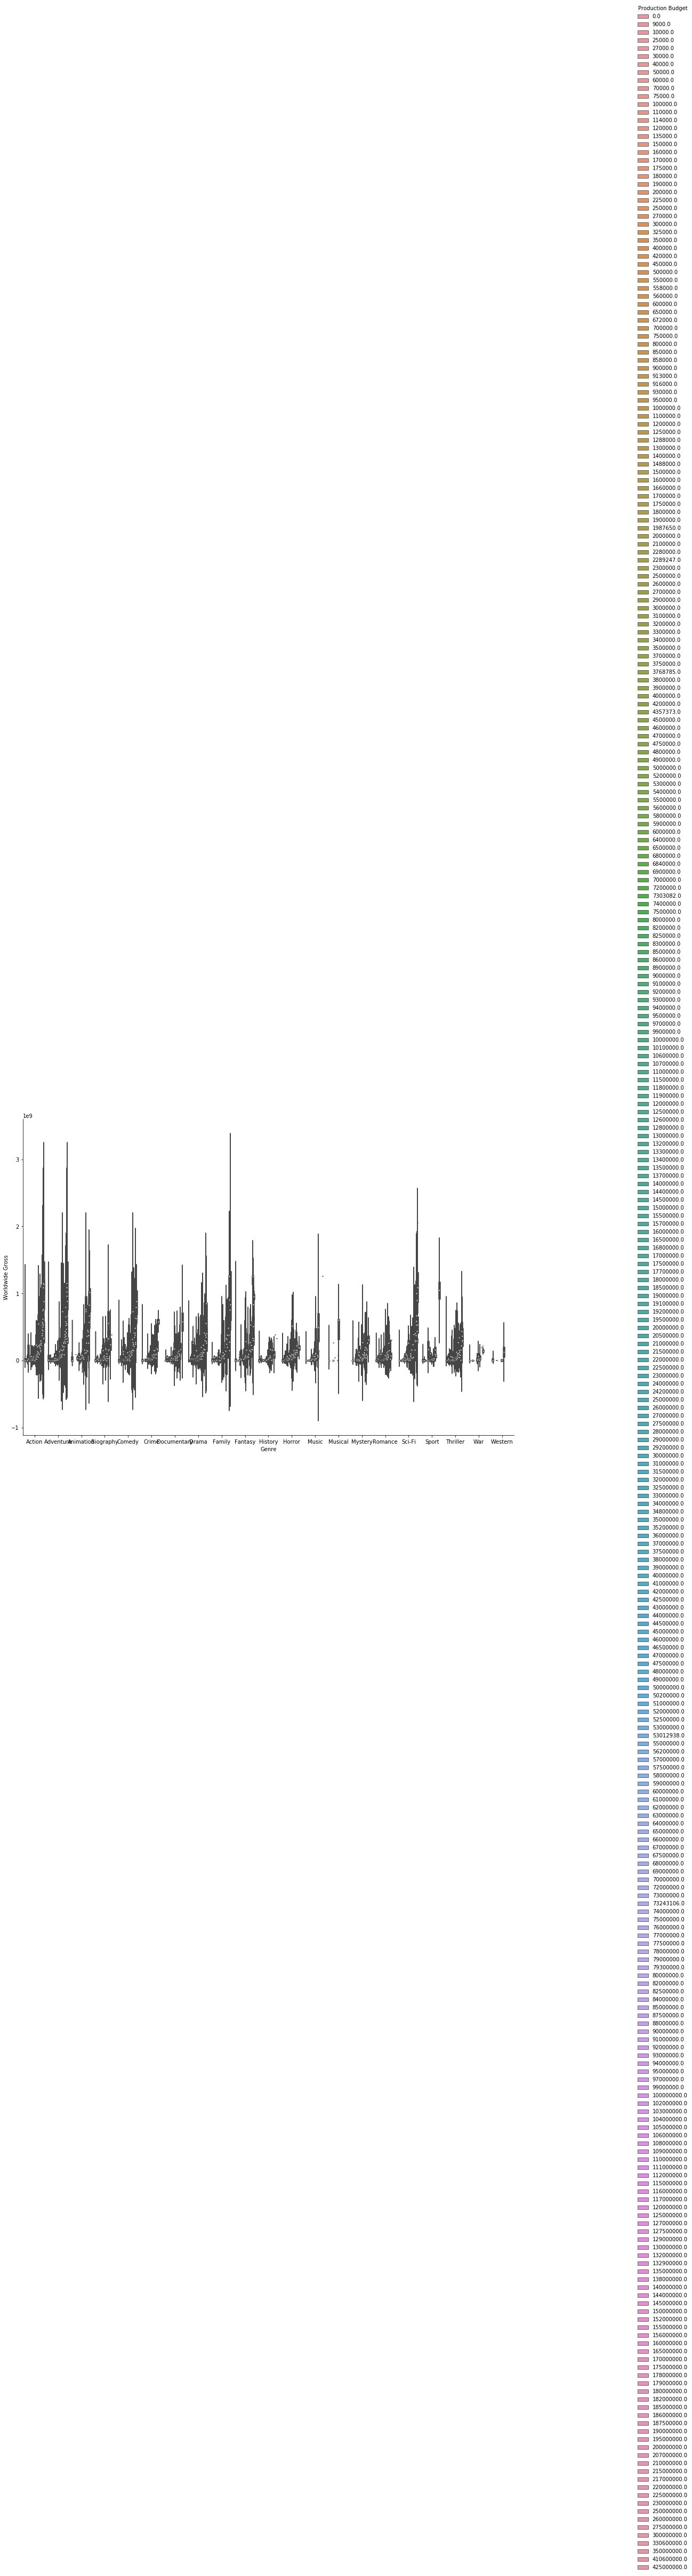

In [43]:
g = sns.catplot(x= 'Genre', y= 'Worldwide Gross', hue ='Production Budget', kind='violin', data = GenreDF2)

g.fig.set_figwidth(20)
g.fig.set_figheight(10)

- Too much information, let's break it down a little more

In [44]:
def returnRate():
    returnRate = []
    for i in GenreDF.index:
        thisGross = GenreDF['Worldwide Gross'][i]
        thisBudget = GenreDF['Production Budget'][i]
        thisIncrease = thisGross - thisBudget
        thisRate = (thisIncrease / thisBudget) * 100
        returnRate.append(thisRate)
    return(returnRate)

- This returnRate function brought divide by zero errors. So I reset the index to the DF.

# Worldwide Stats

## We're Getting Somewhere!

In [45]:
def returnRate2():
    returnRate = []
    for i in GenreDF2.index:
        thisBudget = (GenreDF2['Production Budget'][i])
        if (thisBudget == 0):
            thisRate = 0.0
        else:
            thisGross = GenreDF2['Worldwide Gross'][i]
            thisRate = (thisGross / thisBudget) * 100
        returnRate.append(thisRate)
    return(returnRate)

In [46]:
GenreDF2['Return Rate Worldwide'] = returnRate2()

In [47]:
GenreDF2

,index,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget,Return Rate Worldwide
0,0,'71,Action,1300000.0,355000.0,1655000.0,0.0,0.000000
1,1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0,86.533240
2,2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0,203.195366
3,3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0,0.000000
4,4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
10936,30,The Warrior's Way,Western,5700000.0,5400000.0,8514325.0,42000000.0,20.272202
10937,31,Trespass,Western,16816.0,769716.0,786532.0,35000000.0,2.247234
10938,32,True Grit,Western,171200000.0,81000000.0,252276928.0,35000000.0,720.791223
10939,33,Wild Things,Western,29795299.0,25781400.0,55576699.0,20000000.0,277.883495


In [48]:
def returnRateDom():
    returnRate = []
    for i in GenreDF2.index:
        thisBudget = (GenreDF2['Production Budget'][i])
        if (thisBudget == 0):
            thisRate = 0.0
        else:
            thisGross = GenreDF2['Domestic Gross'][i]
            thisRate = (thisGross / thisBudget) * 100
        returnRate.append(thisRate)
    return(returnRate)

In [49]:
GenreDF2['Return Rate Domestic'] = returnRateDom()
GenreDF2

,index,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget,Return Rate Worldwide,Return Rate Domestic
0,0,'71,Action,1300000.0,355000.0,1655000.0,0.0,0.000000,0.000000
1,1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0,86.533240,61.173470
2,2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0,203.195366,130.857143
3,3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0,0.000000,0.000000
4,4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
10936,30,The Warrior's Way,Western,5700000.0,5400000.0,8514325.0,42000000.0,20.272202,13.571429
10937,31,Trespass,Western,16816.0,769716.0,786532.0,35000000.0,2.247234,0.048046
10938,32,True Grit,Western,171200000.0,81000000.0,252276928.0,35000000.0,720.791223,489.142857
10939,33,Wild Things,Western,29795299.0,25781400.0,55576699.0,20000000.0,277.883495,148.976495


## Try plotting again:

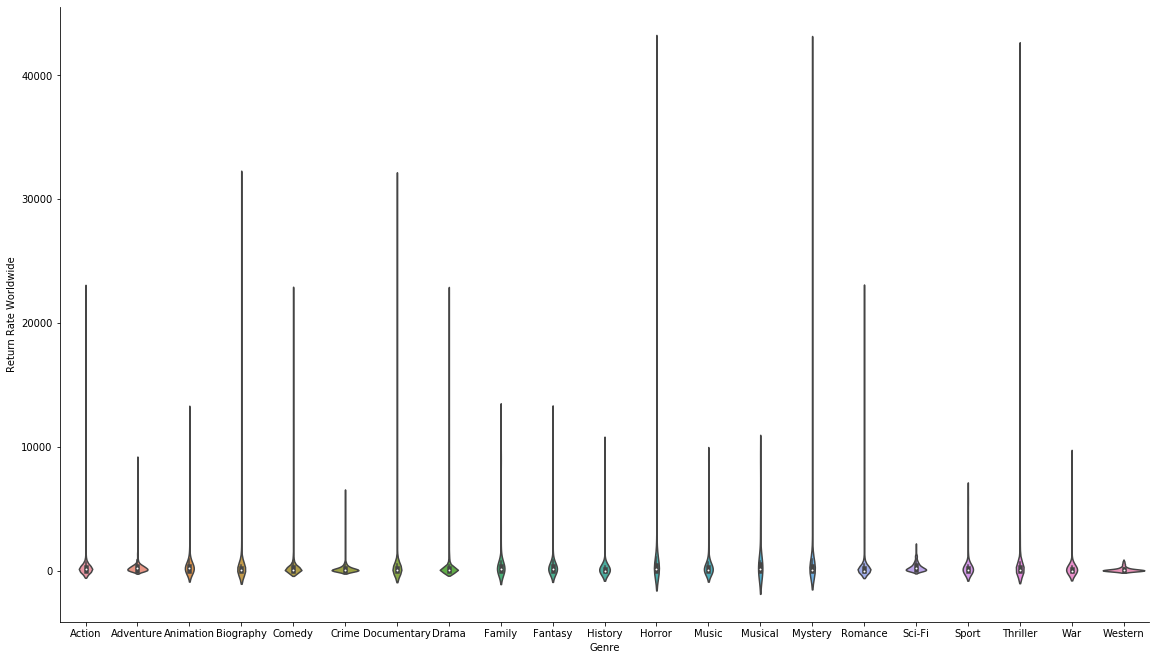

In [50]:
g = sns.catplot(x= 'Genre', y= 'Return Rate Worldwide', kind='violin', data = GenreDF2)

g.fig.set_figwidth(20)
g.fig.set_figheight(10)

- What if we focus on the top grossing genres, and then plot the rate of return on those?

In [72]:
GenreGross= GenreDF2.loc[(GenreDF2['Genre']== 'Action')    |
                         (GenreDF2['Genre']== 'Adventure') |
                         (GenreDF2['Genre']== 'Animation') |
                         (GenreDF2['Genre']== 'Fantasy')   |
                         (GenreDF2['Genre']== 'Sci-Fi')    |
                         (GenreDF2['Genre']== 'Musical')]

In [52]:
GenreGross

,index,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget,Return Rate Worldwide,Return Rate Domestic
0,0,'71,Action,1300000.0,355000.0,1655000.0,0.0,0.000000,0.000000
1,1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0,86.533240,61.173470
2,2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0,203.195366,130.857143
3,3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0,0.000000,0.000000
4,4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
9962,230,X-Men: Apocalypse,Sci-Fi,155400000.0,388500000.0,542537546.0,178000000.0,304.796374,87.303371
9963,231,X-Men: Days of Future Past,Sci-Fi,233900000.0,513900000.0,747862775.0,200000000.0,373.931388,116.950000
9964,232,X-Men: First Class,Sci-Fi,146400000.0,207200000.0,355408305.0,160000000.0,222.130191,91.500000
9965,233,Yes,Sci-Fi,396035.0,265186.0,661221.0,1700000.0,38.895353,23.296176


In [53]:
GenreGross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 0 to 9966
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  2280 non-null   int64  
 1   Title                  2280 non-null   object 
 2   Genre                  2280 non-null   object 
 3   Domestic Gross         2280 non-null   float64
 4   Foreign Gross          2280 non-null   float64
 5   Worldwide Gross        2280 non-null   float64
 6   Production Budget      2280 non-null   float64
 7   Return Rate Worldwide  2280 non-null   float64
 8   Return Rate Domestic   2280 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 178.1+ KB


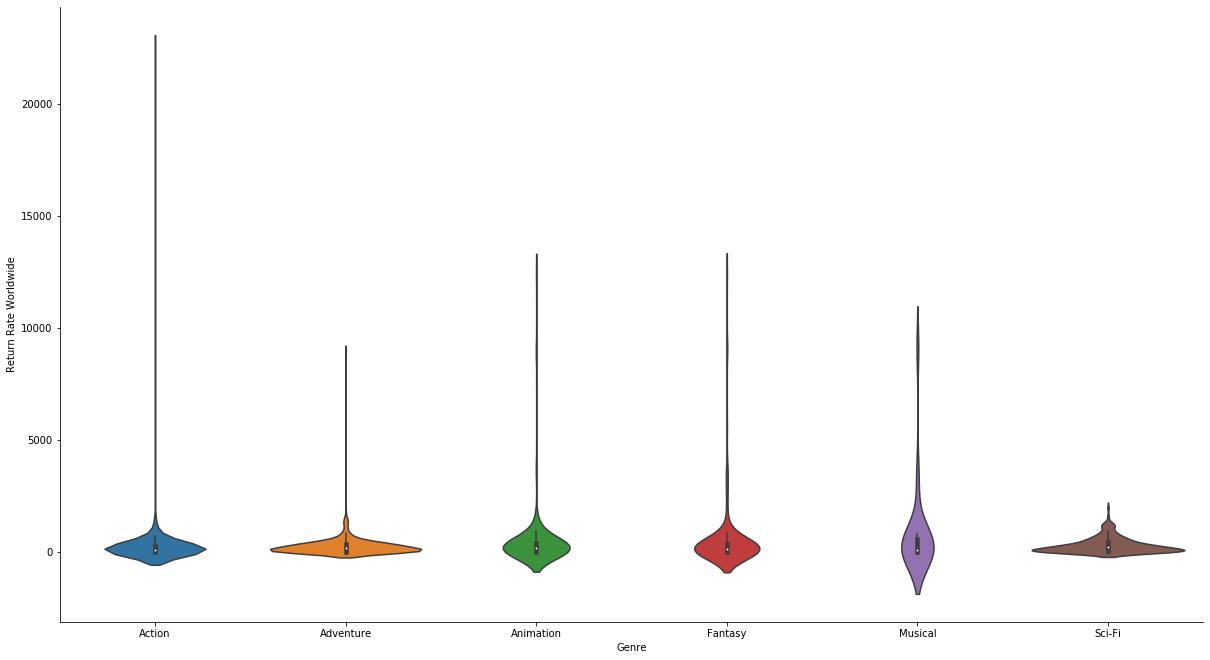

In [54]:
g = sns.catplot(x= 'Genre', y= 'Return Rate Worldwide', kind='violin', data = GenreGross)

g.fig.set_figwidth(20)
g.fig.set_figheight(10)

## Getting Ever Closer

- We still need to make this graph more readable, also need to have hard numbers.

In [55]:
GenreGross2 = GenreGross.loc[GenreGross['Return Rate Worldwide'] < 1000]

In [56]:
GenreGross2

,index,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget,Return Rate Worldwide,Return Rate Domestic
0,0,'71,Action,1300000.0,355000.0,1655000.0,0.0,0.000000,0.000000
1,1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0,86.533240,61.173470
2,2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0,203.195366,130.857143
3,3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0,0.000000,0.000000
4,4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
9962,230,X-Men: Apocalypse,Sci-Fi,155400000.0,388500000.0,542537546.0,178000000.0,304.796374,87.303371
9963,231,X-Men: Days of Future Past,Sci-Fi,233900000.0,513900000.0,747862775.0,200000000.0,373.931388,116.950000
9964,232,X-Men: First Class,Sci-Fi,146400000.0,207200000.0,355408305.0,160000000.0,222.130191,91.500000
9965,233,Yes,Sci-Fi,396035.0,265186.0,661221.0,1700000.0,38.895353,23.296176


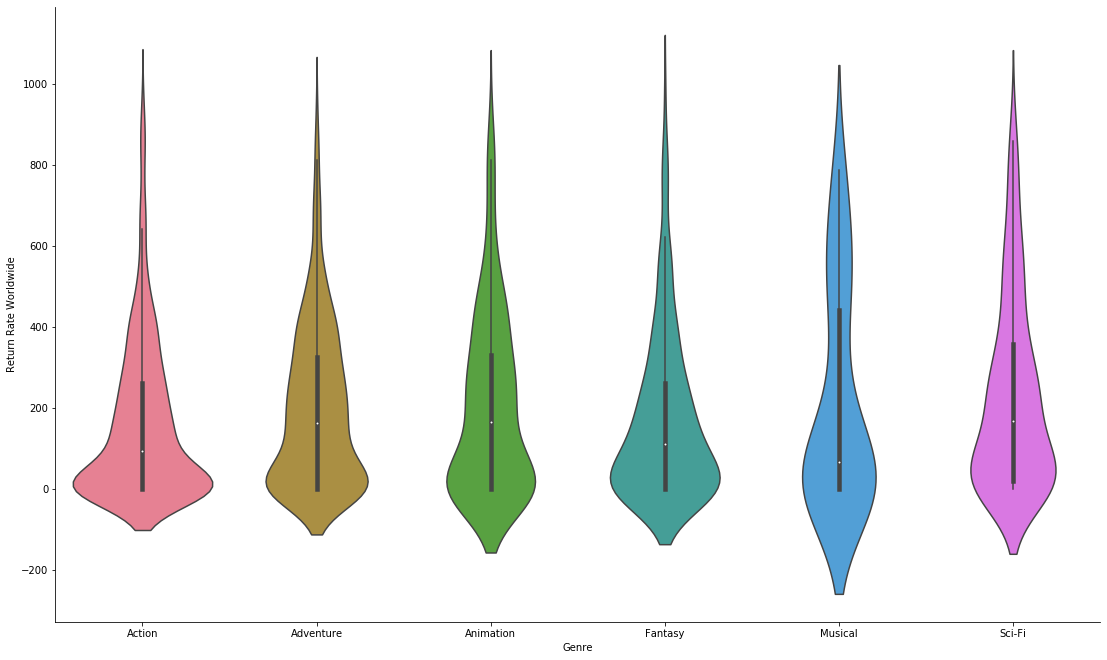

In [57]:
g = sns.catplot(x= 'Genre', y= 'Return Rate Worldwide', kind='violin', data = GenreGross2, palette =(sns.color_palette("husl", 6)))

g.fig.set_figwidth(18)
g.fig.set_figheight(10)

In [58]:
GenreGross3 = GenreGross.loc[GenreGross['Return Rate Worldwide'] < 200]

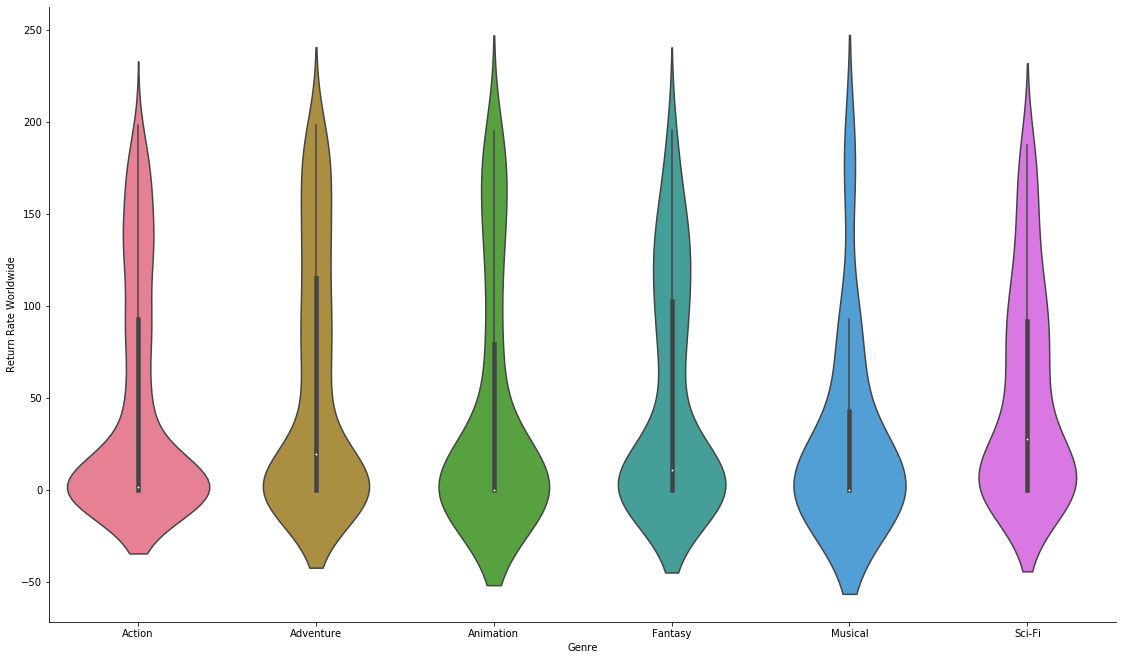

In [59]:
g = sns.catplot(x= 'Genre', y= 'Return Rate Worldwide', kind='violin', data = GenreGross3, palette =(sns.color_palette("husl", 6)))

g.fig.set_figwidth(18)
g.fig.set_figheight(10)

# Domestic Stats

In [62]:
GenreGross4 = GenreGross.loc[GenreGross['Return Rate Domestic'] < 200]

In [63]:
GenreGross4

,index,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget,Return Rate Worldwide,Return Rate Domestic
0,0,'71,Action,1300000.0,355000.0,1655000.0,0.0,0.000000,0.000000
1,1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0,86.533240,61.173470
2,2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0,203.195366,130.857143
3,3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0,0.000000,0.000000
4,4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
9962,230,X-Men: Apocalypse,Sci-Fi,155400000.0,388500000.0,542537546.0,178000000.0,304.796374,87.303371
9963,231,X-Men: Days of Future Past,Sci-Fi,233900000.0,513900000.0,747862775.0,200000000.0,373.931388,116.950000
9964,232,X-Men: First Class,Sci-Fi,146400000.0,207200000.0,355408305.0,160000000.0,222.130191,91.500000
9965,233,Yes,Sci-Fi,396035.0,265186.0,661221.0,1700000.0,38.895353,23.296176


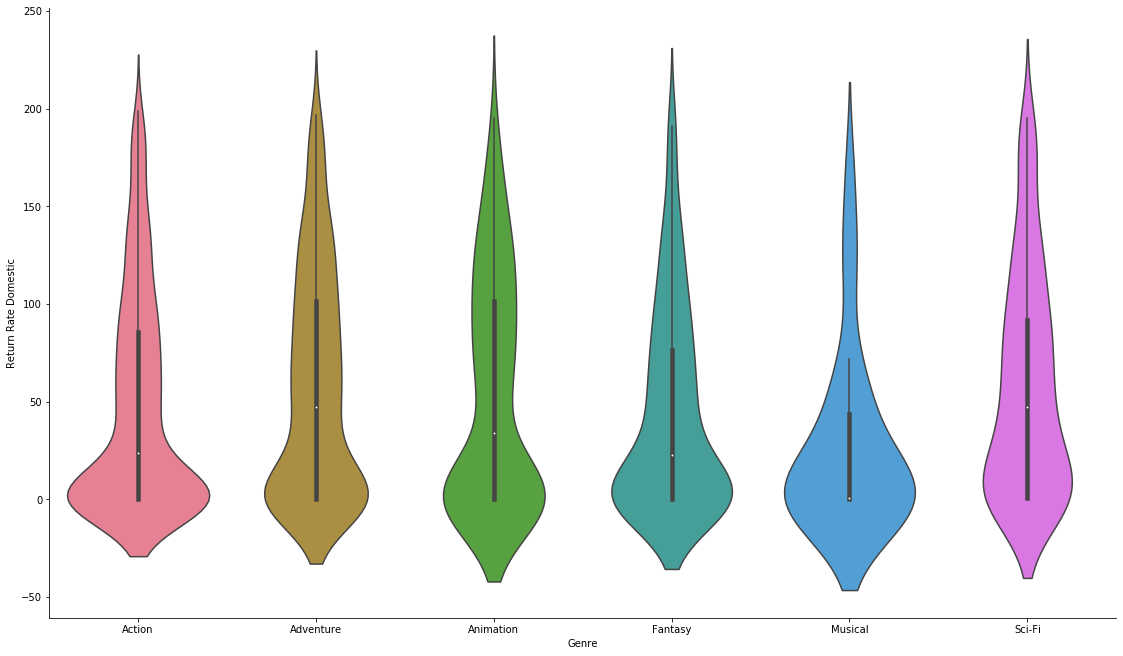

In [64]:
g = sns.catplot(x= 'Genre', y= 'Return Rate Domestic', kind='violin', data = GenreGross4, palette =(sns.color_palette("husl", 6)))

g.fig.set_figwidth(18)
g.fig.set_figheight(10)

# Plotting Based off of Popularity to Return Rate

### Most Popular Genres: 
    Drama, Documentary, Comedy, Horror, Action, Thriller

In [65]:
GenrePop = GenreDF2.loc[(GenreDF2['Genre']== 'Drama')       |
                        (GenreDF2['Genre']== 'Documentary') |
                        (GenreDF2['Genre']== 'Comedy')      |
                        (GenreDF2['Genre']== 'Horror')      |
                        (GenreDF2['Genre']== 'Action')      |
                        (GenreDF2['Genre']== 'Thriller')]

In [66]:
GenrePop

,index,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget,Return Rate Worldwide,Return Rate Domestic
0,0,'71,Action,1300000.0,355000.0,1655000.0,0.0,0.000000,0.000000
1,1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0,86.533240,61.173470
2,2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0,203.195366,130.857143
3,3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0,0.000000,0.000000
4,4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
10811,747,Z for Zachariah,Thriller,121000.0,0.0,121000.0,0.0,0.000000,0.000000
10812,748,Zero Dark Thirty,Thriller,95700000.0,37100000.0,134612435.0,52500000.0,256.404638,182.285714
10813,749,Zoom,Thriller,11989328.0,516860.0,12506188.0,35000000.0,35.731966,34.255223
10814,750,Zulu,Thriller,0.0,1844228.0,1844228.0,16000000.0,11.526425,0.000000


# Worldwide 

In [67]:
GenrePop2 = GenrePop.loc[GenrePop['Return Rate Worldwide'] < 200]

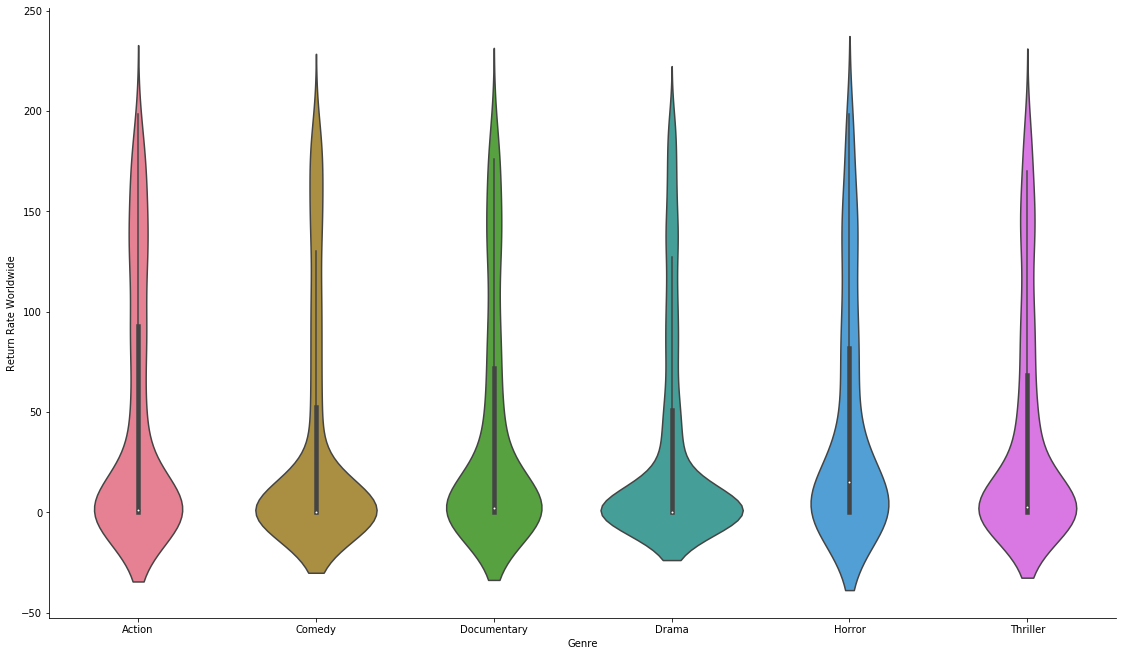

In [78]:
g = sns.catplot(x= 'Genre', y= 'Return Rate Worldwide', kind='violin', data = GenrePop2, palette =(sns.color_palette("husl", 6)))

g.fig.set_figwidth(18)
g.fig.set_figheight(10)

# Domestic

In [70]:
GenrePop3 = GenrePop.loc[GenrePop['Return Rate Domestic'] < 200]

In [71]:
GenrePop3

,index,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget,Return Rate Worldwide,Return Rate Domestic
0,0,'71,Action,1300000.0,355000.0,1655000.0,0.0,0.000000,0.000000
1,1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0,86.533240,61.173470
2,2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0,203.195366,130.857143
3,3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0,0.000000,0.000000
4,4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
10811,747,Z for Zachariah,Thriller,121000.0,0.0,121000.0,0.0,0.000000,0.000000
10812,748,Zero Dark Thirty,Thriller,95700000.0,37100000.0,134612435.0,52500000.0,256.404638,182.285714
10813,749,Zoom,Thriller,11989328.0,516860.0,12506188.0,35000000.0,35.731966,34.255223
10814,750,Zulu,Thriller,0.0,1844228.0,1844228.0,16000000.0,11.526425,0.000000


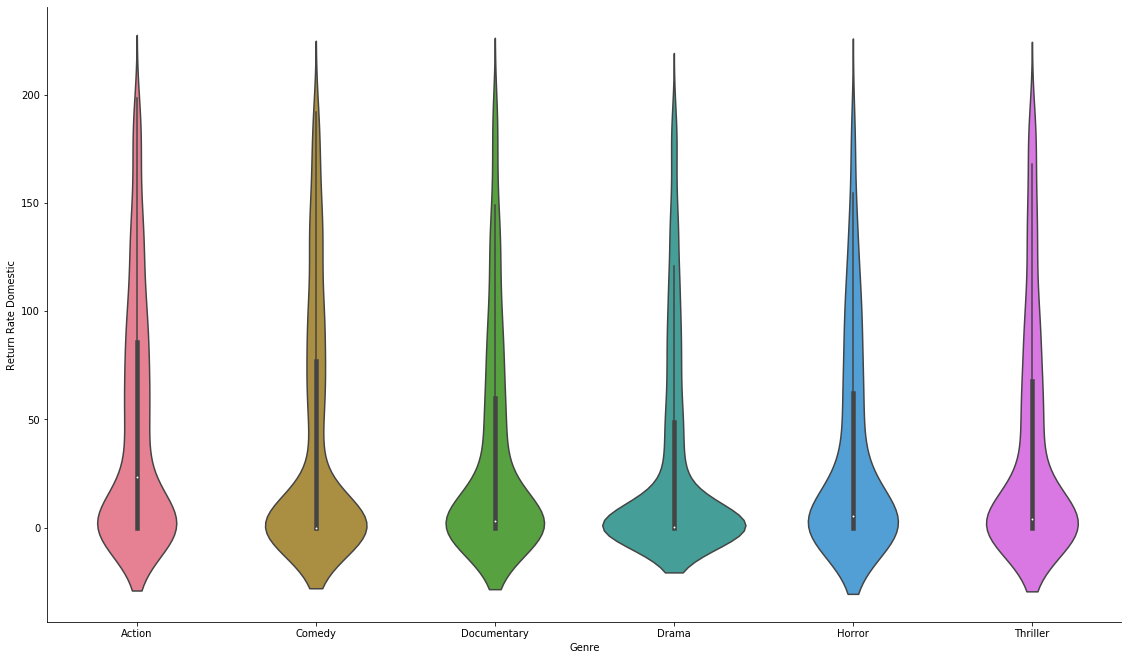

In [72]:
g = sns.catplot(x= 'Genre', y= 'Return Rate Domestic', kind='violin', data = GenrePop3, palette =(sns.color_palette("husl", 6)))

g.fig.set_figwidth(18)
g.fig.set_figheight(10)

# Next Steps

In [1]:
Popularity of my 6 genres Check!
Choose a genre and two back ups 
    Adventure
    Followed by Sci Fi 
    Followed by Action?


SyntaxError: invalid syntax (<ipython-input-1-bb817b784cdf>, line 1)

In [75]:
GenreGross.head()

,index,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget
0,0,'71,Action,1300000.0,355000.0,1655000.0,0.0
1,1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0
2,2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0
3,3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0
4,4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0


KeyboardInterrupt: 

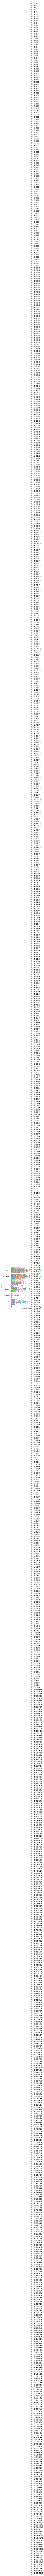

In [78]:
g = sns.catplot(x= 'Production Budget', y= 'Genre', hue = 'Worldwide Gross', kind='swarm', data = GenreGross, palette =(sns.color_palette("husl", 6)))

g.fig.set_figwidth(18)
g.fig.set_figheight(10)